# Fancy Indexing in NumPy

## Import NumPy

In [2]:
import numpy as np

## Fancy Indexing for a One Dimensional Array

In [3]:
# consider a one dimensional array 
arr = np.random.randint(50, size=9)
print(f"Original arr:{arr}")

# let us create a 2D array using fancy indexing 
fancy_ind = [[3,5],
             [4,2]]
arr_2d = arr[fancy_ind]
print(f"The 2D array formed from afncy indexing is:\n{arr_2d}")

Original arr:[39 43  9 39 39 22  7  9 38]
The 2D array formed from afncy indexing is:
[[39 22]
 [39  9]]


In [6]:
# consider now a multidimensional array 
arr_2 = np.arange(12).reshape((3,4))
print(arr_2,'\n')

arr_2[[0,1,2],[1,2,3]]
# [(0,1), (1,2), (2,3)] are the coordinates of the point 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 



array([ 1,  6, 11])

In [ ]:
# but note ... if I want to get a slice of rows and columns 
arr_2[[0,1,2], 1:]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [8]:
# consider now a multidimensional array 
arr_2 = np.arange(12).reshape((3,4))
print(arr_2,'\n')

# let us now do some fancy indexing 
row = np.array([0,1,2])
col = np.array([1,2,3])

print(arr_2[row,col])

# Instead in fancy indexing, if we consider a row vector or a column vector , we get a 2D array
print(arr_2[row[:, np.newaxis], col])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[ 1  6 11]
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In the given code, **broadcasting** plays a key role in allowing the **row vector** and **column vector** to interact correctly when performing **fancy indexing**. Let’s break this down step-by-step to clarify what’s happening.

---

### The Code Breakdown

1. **Array `arr_2`**  
   A 2D array of shape `(3, 4)` is created using `np.arange(12).reshape((3, 4))`:  

   ```python
   arr_2 = np.arange(12).reshape((3, 4))
   print(arr_2)
   ```
   Output:
   ```
   [[ 0  1  2  3]
    [ 4  5  6  7]
    [ 8  9 10 11]]
   ```

2. **Fancy Indexing Without Broadcasting**  
   We create two 1D arrays for **row** and **col** indices:  

   ```python
   row = np.array([0, 1, 2])  # shape (3,)
   col = np.array([1, 2, 3])  # shape (3,)
   print(arr_2[row, col])
   ```
   Here, the shapes of `row` and `col` are both `(3,)`, and they are used directly for indexing.  
   NumPy pairs each row index with the corresponding column index (element-wise):

   - `(row[0], col[0]) -> (0, 1)` → `arr_2[0, 1] = 1`
   - `(row[1], col[1]) -> (1, 2)` → `arr_2[1, 2] = 6`
   - `(row[2], col[2]) -> (2, 3)` → `arr_2[2, 3] = 11`

   Output:
   ```
   [ 1  6 11]
   ```

3. **Fancy Indexing With Broadcasting**  
   When we introduce a row vector (`row[:, np.newaxis]`) and keep `col` as is, **broadcasting** occurs:

   ```python
   print(arr_2[row[:, np.newaxis], col])
   ```

   - `row[:, np.newaxis]` reshapes `row` from shape `(3,)` into shape `(3, 1)` (a column vector).
   - `col` has a shape of `(3,)` (a row vector).

   Here is the result of their shapes before broadcasting:

   - `row[:, np.newaxis]` → shape **(3, 1)**
   - `col` → shape **(3,)**

   **Broadcasting Rules** apply to make their shapes compatible:
   - The `(3, 1)` shape expands horizontally to match `(3,)` → resulting shape is **(3, 3)**.

---

### Broadcasting in Detail

1. **Column Vector (`row[:, np.newaxis]`)**  
   ```python
   row[:, np.newaxis]
   ```
   Output:
   ```
   [[0]
    [1]
    [2]]
   ```
   Shape: `(3, 1)` — This represents the row indices as a column vector.

2. **Row Vector (`col`)**  
   ```python
   col
   ```
   Output:
   ```
   [1 2 3]
   ```
   Shape: `(3,)` — This represents the column indices as a row vector.

3. **Broadcasting the Indices**  
   NumPy **broadcasts** these two shapes `(3, 1)` and `(3,)` to produce a 2D grid of indices with shape `(3, 3)`.

   - Row indices:  
     ```
     [[0]
      [1]
      [2]]
     ```
     Broadcasted horizontally to match `(3,)`:  
     ```
     [[0 0 0]
      [1 1 1]
      [2 2 2]]
     ```

   - Column indices:  
     ```
     [1 2 3]
     ```
     Broadcasted vertically to match `(3, 1)`:  
     ```
     [[1 2 3]
      [1 2 3]
      [1 2 3]]
     ```

4. **Resulting Pairing of Indices**  
   After broadcasting, the row and column indices combine element-wise:

   ```
   row_indices = [[0, 0, 0],
                  [1, 1, 1],
                  [2, 2, 2]]

   col_indices = [[1, 2, 3],
                  [1, 2, 3],
                  [1, 2, 3]]
   ```

   These indices are then applied to `arr_2`:

   - For the first row (`row=0`):  
     Indices → `(0, 1), (0, 2), (0, 3)` → Values → `[1, 2, 3]`
   - For the second row (`row=1`):  
     Indices → `(1, 1), (1, 2), (1, 3)` → Values → `[5, 6, 7]`
   - For the third row (`row=2`):  
     Indices → `(2, 1), (2, 2), (2, 3)` → Values → `[9, 10, 11]`

---

### Final Output

The result is a 2D array of shape `(3, 3)`:

```
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
```

---

### Summary of Broadcasting

- `row[:, np.newaxis]` reshapes the row indices into a column vector of shape `(3, 1)`.
- `col` remains a row vector of shape `(3,)`.
- Broadcasting combines these two shapes into a grid of shape `(3, 3)`:
   - Rows expand horizontally.
   - Columns expand vertically.
- The resulting grid of indices is used for fancy indexing, producing a 2D array. 

This demonstrates how broadcasting simplifies the process of combining row and column vectors for multidimensional indexing.

## Combined Indexing 

Fancy Indexing can be combined with other forms of indexing too!

In [9]:
# combine with simple indices 
print(arr_2[2, col],'\n')

# combine with slicing 
print(arr_2[1:,col],'\n')

# combine with boolean masking
print(arr_2[row[:, np.newaxis], [False, True, True, True]]) 

[ 9 10 11] 

[[ 5  6  7]
 [ 9 10 11]] 

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


## Modifying Values with Fancy Indexing 

In [21]:
# let us take an array 
arr_1 = np.random.randint(100, size=10)
print(arr_1)

[80 74 78 51 14 66 78 63 93 87]


In [22]:
# let us now use fancy indexing to change the numbers 
index = [2,4,6,8]
arr_1[index] = 100

print(arr_1)

[ 80  74 100  51 100  66 100  63 100  87]


In [23]:
arr_1[index]+=100
print(arr_1)

[ 80  74 200  51 200  66 200  63 200  87]


Howver, sometimes it may lead to unexpected results! Let us see them.

In [25]:
arr_0 = np.zeros(10)

#say I want to add 1 to certain indices i.e. at index 2 add 1 , index 3 add 1 two times and at index 4 add1 three times 
index = [2,3,3,4,4,4]
np.add.at(arr_0, index, 1)
print(arr_0)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [26]:
# Note here if i had done the following operation instead 
arr_0 = np.zeros(10)
arr_0[index]+=1

print(arr_0)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


The reason for this result is, we are not doing here multiple increments but multiple assignments!

### Example of Binning Data - Histogram by hand!

In [10]:
rng = np.random.default_rng(10)
arr_1 = rng.normal(size=1000)

# let us create a histogram 
bins = np.linspace(-5,5,50) # crate the bins - here we have 50 bins from -5 to 5 
counts = np.zeros_like(bins) # now make all the bins have 0 values at start 

# find the appropriate bin for each element of the array
i = np.searchsorted(bins, arr_1) 

# add 1 to each one of these bins 
np.add.at(counts,i,1)

In [ ]:
counts # see th bin counts 

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  4.,  2.,
        3.,  8.,  9., 15., 28., 32., 40., 48., 65., 65., 81., 88., 70.,
       90., 61., 73., 58., 45., 30., 33., 16., 14.,  8.,  3.,  4.,  3.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  4.,  2.,  3.,
         8.,  9., 15., 28., 32., 40., 48., 65., 65., 81., 88., 70., 90.,
        61., 73., 58., 45., 30., 33., 16., 14.,  8.,  3.,  4.,  3.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
        -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
        -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
         0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
         1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
         2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
         3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
         4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5. 

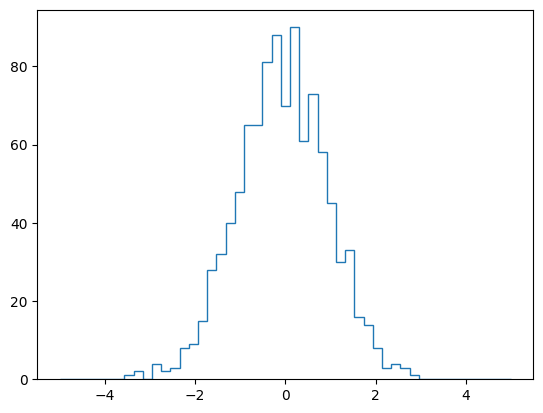

In [14]:
# using the hist
import matplotlib.pyplot as plt 
plt.hist(arr_1, bins, histtype='step')

This function will create a nearly identical plot to the one just shown. To compute the
binning, Matplotlib uses the np.histogram function, which does a very similar computation
to what we did before. Let’s compare the two here:

In [43]:
print(f"NumPy histogram ({len(arr_1)} points):")
%timeit counts, edges = np.histogram(arr_1, bins)

print(f"Custom histogram ({len(arr_1)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, arr_1), 1)

NumPy histogram (100 points):
16 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom histogram (100 points):
16.8 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [42]:
x = rng.normal(size=1000000)

print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (1000000 points):
53.3 ms ± 556 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom histogram (1000000 points):
79.2 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Note on `np.searchsorted()`

`np.searchsorted` is a function in NumPy that is used to **find indices** where elements should be inserted into a sorted array in order to maintain its sorted order.

---

### **Syntax**

```python
numpy.searchsorted(a, v, side='left', sorter=None)
```

- **`a`**: Input **sorted** 1D array.
- **`v`**: Values to insert into `a` to find the appropriate index.
- **`side`**:  
   - `'left'` (default): Returns the first suitable index where `v` can be inserted.  
   - `'right'`: Returns the last suitable index where `v` can be inserted.
- **`sorter`**: An optional argument that specifies the indices of the array `a` that would sort it.

---

### **How It Works**

- `np.searchsorted` searches for the indices where elements in `v` should go to maintain the order of the sorted array `a`.
- If `side='left'`, it returns the index of the first position where the element can be inserted.
- If `side='right'`, it returns the index of the last position where the element can be inserted.

---

### **Examples**

#### **1. Basic Example (side='left')**
```python
import numpy as np

a = np.array([1, 3, 5, 7, 9])
v = [4, 6, 8]

indices = np.searchsorted(a, v, side='left')
print(indices)
```
**Output**:
```
[2 3 4]
```

- `4` should be inserted at index `2` to keep `a` sorted.
- `6` should be inserted at index `3`.
- `8` should be inserted at index `4`.

---

#### **2. Using `side='right'`**
```python
a = np.array([1, 3, 5, 7, 9])
v = [5, 7, 9]

indices = np.searchsorted(a, v, side='right')
print(indices)
```
**Output**:
```
[3 4 5]
```

Here, `side='right'` ensures the elements are inserted **after** any existing occurrences.

- `5` is inserted at index `3`.
- `7` is inserted at index `4`.
- `9` is inserted at index `5`.

---

#### **3. Search in a Custom-Sorted Array (with `sorter`)**

If `a` is not sorted but you have the sorting order:
```python
a = np.array([10, 20, 15, 30])
sorter = np.argsort(a)  # Sorting indices
v = [25, 5]

indices = np.searchsorted(a, v, sorter=sorter)
print(indices)
```

**Output**:
```
[3 0]
```

- `sorter = [0, 2, 1, 3]` is the sorting order of `a`.  
- `25` would go at index `3`.  
- `5` would go at index `0`.

---

### **4. Inserting Values into the Array**

`np.searchsorted` is often combined with `np.insert` to insert elements in sorted order:
```python
a = np.array([1, 3, 5, 7])
v = [2, 4]

indices = np.searchsorted(a, v)
a = np.insert(a, indices, v)

print(a)
```

**Output**:
```
[1 2 3 4 5 7]
```

---

### **Use Cases**

- Finding where to insert values to keep an array sorted.
- Efficient binary search on sorted arrays.
- Combining with `np.insert` for maintaining sorted lists.



In [38]:
# Sorting a 2D array

# consider this 2D array
rng = np.random.default_rng(10)
int_2D = rng.integers(0,100,30).reshape((6,5))
int_2D

array([[77, 95, 26, 20, 79],
       [82, 51, 14, 83, 51],
       [15, 13, 41, 68, 40],
       [84,  0, 42, 52, 95],
       [23, 82,  7, 33, 74],
       [57, 93, 75, 91, 82]])

In [32]:
# I want to sort along the rows 
np.sort(int_2D, axis=1, kind='heapsort')

array([[20, 26, 77, 79, 95],
       [14, 51, 51, 82, 83],
       [13, 15, 40, 41, 68],
       [ 0, 42, 52, 84, 95],
       [ 7, 23, 33, 74, 82],
       [57, 75, 82, 91, 93]])

In [ ]:
# the indices for each row sorted accordingly 
np.argsort(int_2D, axis=1, kind='heapsort', )

array([[3, 2, 0, 4, 1],
       [2, 4, 1, 0, 3],
       [1, 0, 4, 2, 3],
       [1, 2, 3, 0, 4],
       [2, 0, 3, 4, 1],
       [0, 2, 4, 3, 1]])

In [43]:
# if we want it the be sorted in a descending order 
np.argsort(int_2D, axis=1, kind='heapsort', )[:,::-1]

array([[1, 4, 0, 2, 3],
       [3, 0, 1, 4, 2],
       [3, 2, 4, 0, 1],
       [4, 0, 3, 2, 1],
       [1, 4, 3, 0, 2],
       [1, 3, 4, 2, 0]])

In [33]:
# I want to sort along the columns 
np.sort(int_2D, axis=0)

array([[15,  0,  7, 20, 40],
       [23, 13, 14, 33, 51],
       [57, 51, 26, 52, 74],
       [77, 82, 41, 68, 79],
       [82, 93, 42, 83, 82],
       [84, 95, 75, 91, 95]])

In [ ]:
# now , say, we want a partial sort - i.e. first 2 slots of each row must have the smallest element from that row 
rng = np.random.default_rng(10)
int_2D = rng.integers(0,100,30).reshape((6,5))

np.partition(int_2D, kth=2, axis=1)

array([[20, 26, 77, 79, 95],
       [14, 51, 51, 82, 83],
       [13, 15, 40, 41, 68],
       [ 0, 42, 52, 84, 95],
       [ 7, 23, 33, 74, 82],
       [57, 75, 82, 91, 93]])



## 🧠 What is `np.lexsort()`?

> **`np.lexsort()` performs an indirect sort using multiple sorting keys.**

It returns the **indices** that would sort an array (or arrays), using the **last key as the primary sort**, the second-last as the secondary, and so on — like **lexicographic order** (hence the name).

---

### 📊 Real-Life Example: Sort Students by Class, then by Marks

```python
import numpy as np

# Let's say we have:
# class_numbers = [10, 10, 9, 10, 9]
# marks         = [88, 92, 85, 95, 90]

class_numbers = np.array([10, 10, 9, 10, 9])
marks = np.array([88, 92, 85, 95, 90])

# Sort by class, then by marks within each class
idx = np.lexsort((marks, class_numbers))

print(idx)  # Sorted indices
```

### 🧾 Output:
```
[2 4 0 1 3]
```

So the sorted records would be:
```python
for i in idx:
    print(f"Class: {class_numbers[i]}, Marks: {marks[i]}")
```

### ✅ Output:
```
Class: 9, Marks: 85
Class: 9, Marks: 90
Class: 10, Marks: 88
Class: 10, Marks: 92
Class: 10, Marks: 95
```

---

### 🧩 Syntax Recap:

```python
np.lexsort((key1, key2, ..., keyN))
```

- Sorts by **keyN** first (primary key), then keyN−1 (secondary), and so on.
- All keys must be the same shape.
- Returns an array of sorted **indices** — which you can use to index the original arrays.

---

### 🧙 Why Use `lexsort()`?

- To sort using **multiple keys** (like sorting a DataFrame by two columns)
- Much faster and cleaner than writing nested loops or using `argsort()` repeatedly

---

### ⚠️ Tip:

If you're coming from `pandas`, this is like:

```python
df.sort_values(by=['class_number', 'marks'])
```

But in pure NumPy form ✨.

---
